In [1]:
#常用
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
import warnings
warnings.filterwarnings('ignore')

#統計
import scipy.stats as st

#機器學習
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#系統操作、解壓縮檔案
import os
from zipfile import ZipFile

In [2]:
###資料匯入
class DataImport:
    def __init__(self):
        self.data_dir = os.getcwd()
    
    #資料夾路徑
    def set_dir(self, data_path):
        self.data_dir = os.path.join(self.data_dir, data_path)
    
    #壓縮檔名 
    def read_zip(self, filename):
        self.file_path = os.path.join(self.data_dir, filename)
        print('Path of read in data: %s' % (self.file_path))
        myzip=ZipFile(self.file_path)
        for i in myzip.filelist:
            print(i.filename)
        myzip.close()
    
    #讀取壓縮檔內的資料
    def read_zip_data(self, dataname):
        myzip=ZipFile(self.file_path)
        f=myzip.open(dataname)
        df=pd.read_csv(f)
        f.close()
        myzip.close()
        return df

def feature_eda(feature_name, log1p=0, astype=[0,'object']):
    if log1p:
        feature = np.log1p(train[feature_name])
    else:
        feature = train[feature_name]
    if astype[0]:
        feature = feature.astype(astype[1])
    test_feature = test[feature_name]
    target = train['SalePrice']

    print('Type : {}'.format(feature.dtypes))
    na_ratio = feature.isna().sum()/len(feature)
    print('NA Ratio : {}'.format(na_ratio))
    na_ratio = test_feature.isna().sum()/len(test_feature)
    print('Test NA Ratio : {}'.format(na_ratio))
    
    unique_ct, unique_ratio =len(feature.unique()), len(feature.unique())/len(feature)
    print('unique_ct : {}, unique_ratio : {:.2f}'.format(unique_ct, unique_ratio))
    
    if feature.dtypes in ['float','int64']:
        feature_summarize= pd.DataFrame(feature.describe()).T
        feature_summarize['skew'] = feature.skew()
        feature_summarize['kurt'] = feature.kurt()
        print(feature_summarize)

        plt.figure(1,figsize=(6, 4))
        plt.title(feature_name)
        sns.distplot(feature, 
                     kde=False, 
                     fit=st.norm)

        plt.figure(2,figsize=(6, 4))
        res = st.probplot(feature,plot=plt)

        plt.figure(3,figsize=(6, 4))
        sns.boxplot(feature)
        plt.show()
        
        plt.figure(4,figsize=(6, 4))
        sns.jointplot(x=feature, y=target,kind='scatter',color='#0066CC')
        plt.show()
    else:
        plt.figure(1,figsize=(8, 6))
        sns.boxplot(x=feature, y=target,color='#0066CC')
        plt.xticks(rotation=90)
        plt.show()

In [314]:
DTImport = DataImport()
DTImport.set_dir(data_path = './data/')
DTImport.read_zip(filename = 'house-prices.zip')
train = DTImport.read_zip_data(dataname = 'train.csv')
test = DTImport.read_zip_data(dataname = 'test.csv')

Path of read in data: C:\Users\User\Desktop\GitHub\Projects\SideProject\03_Kaggle_House_Prices\./data/house-prices.zip
data_description.txt
sample_submission.csv
test.csv
train.csv


In [315]:
# features = pd.DataFrame(columns=['features','features_name','type','astype','drop_YN','outlier','missing_values','feature_engineer'])
# features['features'] = train.columns
# features.to_excel(r'Features_v3.xlsx',index=0)

In [316]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Type : object
NA Ratio : 0.025342465753424658
Test NA Ratio : 0.030843043180260453
unique_ct : 5, unique_ratio : 0.00


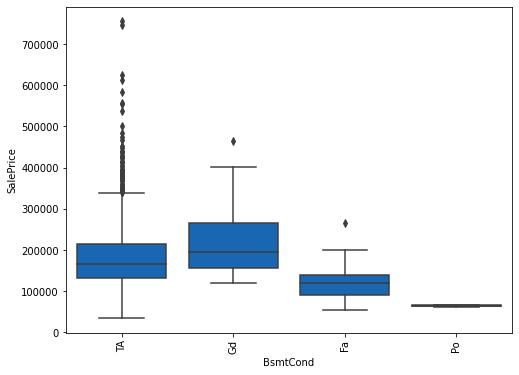

In [248]:
feature_name = 'BsmtCond'
feature_eda(feature_name = feature_name,log1p=0,astype=[0,'object'])

In [249]:
train_feature= pd.Series(train[feature_name].astype('object').unique())
test_feature= pd.Series(test[feature_name].astype('object').unique())
test_feature[-test_feature.isin(train_feature)]

Series([], dtype: object)

In [250]:
train02 = train.copy()
train02.fillna('NA',inplace=True)

In [251]:
# train02['type'] = train02[feature_name]>0
# train02.groupby(['type'])['SalePrice'].agg(['mean','count']).sort_values(by = 'mean',ascending=False)

In [252]:
train02.groupby([feature_name])['SalePrice'].agg(['mean','count']).sort_values(by = 'mean',ascending=False)

,mean,count
BsmtCond,,
Gd,213599.907692,65
TA,183632.620900,1311
Fa,121809.533333,45
NA,105652.891892,37
Po,64000.000000,2


In [253]:
train02.groupby([feature_name])['SalePrice'].mean().to_dict()

{'Fa': 121809.53333333334,
 'Gd': 213599.9076923077,
 'NA': 105652.8918918919,
 'Po': 64000.0,
 'TA': 183632.6209000763}

In [16]:
# train[feature_name][(train[feature_name]>1220)].index
train[feature_name][(train[feature_name]>500)&(train['SalePrice']<100000)].index

Int64Index([495], dtype='int64')

In [317]:
feature_astype=['MSSubClass','YearBuilt','YearRemodAdd','FullBath','MoSold','YrSold']
feature_astype_float=['WoodDeckSF']

feature_drop=['Alley','Condition2','RoofMatl','ExterCond','BsmtFinSF2','BsmtUnfSF','Heating',
              'LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'Functional','GarageYrBlt','3SsnPorch','PoolArea','PoolQC','Fence','MiscFeature',
              'MiscVal','Utilities']
index_drop=[934, 1298, 297, 523, 581, 1061, 1190,495]

feature_add=['BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
             'ScreenPorch']
feature_multi=['BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               'ScreenPorch']
feature_limit=['TotRmsAbvGrd','GarageCars']

na_median=['LotFrontage','BsmtFinSF1','TotalBsmtSF']
na_0=['MasVnrArea','GarageCars','GarageArea']
na_NA=['Exterior2nd','MasVnrType','BsmtQual','BsmtExposure','BsmtFinType1','Electrical','KitchenQual',
       'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','SaleType','BsmtCond']

feature_onehot=['MSZoning','Street','LotShape','LandContour','MasVnrType',
                'LotConfig','LandSlope','BldgType','YearBuilt','YearRemodAdd',
                'RoofStyle','Exterior2nd','Foundation','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','CentralAir','KitchenQual','FireplaceQu',
                'GarageType','GarageQual','GarageCond','PavedDrive','MoSold','YrSold','SaleType','SaleCondition']

feature_lop1p=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF',
               'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

replace_words={}
replace_words['MSSubClass']={
    "['30','45','50','85','90','150','160','180','190']":1,
    "['20','40','70','75','80']":2,
    "['60','120']":3
}
replace_words['Neighborhood']={
 'Blmngtn': 194870.88235294117,
 'Blueste': 137500.0,
 'BrDale': 104493.75,
 'BrkSide': 124834.05172413793,
 'ClearCr': 212565.42857142858,
 'CollgCr': 197965.77333333335,
 'Crawfor': 210624.72549019608,
 'Edwards': 128219.7,
 'Gilbert': 192854.50632911394,
 'IDOTRR': 100123.78378378379,
 'MeadowV': 98576.4705882353,
 'Mitchel': 156270.1224489796,
 'NAmes': 145847.08,
 'NPkVill': 142694.44444444444,
 'NWAmes': 189050.0684931507,
 'NoRidge': 335295.31707317074,
 'NridgHt': 316270.6233766234,
 'OldTown': 128225.30088495575,
 'SWISU': 142591.36,
 'Sawyer': 136793.13513513515,
 'SawyerW': 186555.7966101695,
 'Somerst': 225379.83720930232,
 'StoneBr': 310499.0,
 'Timber': 242247.44736842104,
 'Veenker': 238772.72727272726}
replace_words['Condition1']={
    "['Artery','RRAe','Feedr']":1,
    "['RRAn','Norm','RRNe']":2,
    "['RRNn','PosN','PosA']":3
}
replace_words['HouseStyle']={'1.5Fin': 143116.74025974027,
 '1.5Unf': 110150.0,
 '1Story': 175985.4779614325,
 '2.5Fin': 220000.0,
 '2.5Unf': 157354.54545454544,
 '2Story': 210051.76404494382,
 'SFoyer': 135074.48648648648,
 'SLvl': 166703.38461538462}
replace_words['Exterior1st']={
    "['BrkComm','AsphShn','CBlock','AsbShng','MetalSd','Wd Sdng']":1,
    "['WdShing','Stucco','HdBoard','Plywood','BrkFace']":2,
    "['VinylSd','CemntBd','Stone','ImStucc']":3
}
replace_words['ExterQual']={
 'Ex': 367360.96153846156,
 'Fa': 87985.21428571429,
 'Gd': 231633.51024590165,
 'TA': 144341.31346578366}
replace_words['BsmtCond']={
 'Fa': 121809.53333333334,
 'Gd': 213599.9076923077,
 'NA': 105652.8918918919,
 'Po': 64000.0,
 'TA': 183632.6209000763}
replace_words['HeatingQC']={
 'Ex': 214914.42914979756,
 'Fa': 123919.48979591837,
 'Gd': 156858.87136929462,
 'Po': 87000.0,
 'TA': 142362.8761682243}
replace_words['Electrical']={
    "['Mix','FuseP','FuseF','FuseA','NA']":0,
    "SBrkr":1
}
replace_words['FullBath']={
    "['0','1']":0,
    "['2','3','4']":1
}
replace_words['GarageFinish']={
 'Fin': 240052.6903409091,
 'NA': 103317.28395061729,
 'RFn': 202068.86966824645,
 'Unf': 142156.42314049587}

In [318]:
train_id = train.Id
test_id = test.Id
train_Y = train.SalePrice

In [319]:
train.drop(['Id','SalePrice'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [320]:
data = pd.concat([train,test]).reset_index(drop=True)

In [321]:
data.drop(feature_drop,axis=1,inplace=True)

In [322]:
for c in feature_astype:
    data[c] = data[c].astype('str')
for c in feature_astype_float:
    data[c] = data[c].astype('float')

In [323]:
for c in na_median:
    data[c] = data[c].fillna(data[c].median())
for c in na_0:
    data[c] = data[c].fillna(0)
for c in na_NA:
    data[c] = data[c].fillna('NA')

In [324]:
for c in feature_lop1p:
    data[c] = np.log1p(data[c])

In [325]:
for c in feature_add:
    if c == 'BsmtFinSF1':
        data[c+'_>'] = (data[c]>4).astype('int')
    else:
        data[c+'_>'] = (data[c]>0).astype('int')

for c in feature_multi:
    data[c] = data[c] * data[c+'_>']

In [326]:
data['TotRmsAbvGrd'][data['TotRmsAbvGrd']>10] = 10
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('int64')
data['GarageCars'][data['GarageCars']>3] = 3
data['GarageCars'] = data['GarageCars'].astype('int64')

In [327]:
for c in replace_words:
    data[c] = data[c].astype('str')
    data[c].replace(regex = replace_words[c],inplace=True)

In [328]:
data = pd.concat([data,pd.get_dummies(data.loc[:,feature_onehot])],axis=1)
data.drop(feature_onehot,axis=1,inplace=True)

In [329]:
for c in data.columns[data.dtypes=='uint8']:
    data[c] = data[c].astype('int64')
for c in data.columns[data.dtypes=='int32']:
    data[c] = data[c].astype('int64')

In [330]:
train_num = len(train_id)
train_num -= len(index_drop)

In [331]:
data.drop(index_drop,inplace= True)

In [332]:
feature_numeric_needtrans = list(data.columns[data.dtypes=='float'].values)

In [339]:
data_trans = data.copy()

In [340]:
z_score = StandardScaler()
z_score.fit(data_trans[feature_numeric_needtrans])
data_trans[feature_numeric_needtrans] = z_score.transform(data_trans[feature_numeric_needtrans])

In [341]:
MMscaler = MinMaxScaler()
MMscaler.fit(data_trans[feature_numeric_needtrans])
data_trans[feature_numeric_needtrans] = MMscaler.transform(data_trans[feature_numeric_needtrans])

In [342]:
data_trans

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,Exterior1st,MasVnrArea,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.496601,0.366271,0.419862,1,0.909438,7,5,1,0.730823,...,0,0,0,1,0,0,0,0,1,0
1,1,0.589174,0.391245,0.592248,1,0.599322,6,8,1,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1,0.516695,0.422289,0.419862,1,0.909438,7,5,1,0.704616,...,0,0,0,1,0,0,0,0,1,0
3,1,0.460990,0.390223,0.473339,1,0.909438,7,5,1,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,1,0.610962,0.468694,1.000000,1,0.909438,8,5,1,0.810720,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1,0.000000,0.077909,0.000000,1,0.909438,4,7,1,0.000000,...,0,0,0,1,0,0,0,0,1,0
2915,1,0.000000,0.073617,0.000000,1,0.909438,4,5,1,0.000000,...,0,0,0,1,1,0,0,0,0,0
2916,1,0.899695,0.534906,0.243722,1,0.599322,5,7,1,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,1,0.475573,0.407682,0.243722,1,0.226896,5,5,1,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [398]:
# n= 369
# pca=PCA(n_components=n)
# pca.fit(data_trans)
# data_trans_pca = pca.transform(data_trans)
# print(np.round(pca.explained_variance_ratio_, 4)[:2])
# print('Explained Variance Ratio : {}'.format(round(sum(pca.explained_variance_ratio_),3)))

[0.2043 0.0832]
Explained Variance Ratio : 1.0


In [411]:
data_trans_pca = data_trans.copy()

In [412]:
data_trans_pca.shape

(2911, 369)

In [413]:
train_X = data_trans_pca[:train_num]

In [414]:
test_X = data_trans_pca[train_num:]

In [415]:
# train_Y.drop(index_drop,inplace=True)
# train_Y = np.log1p(train_Y)

In [416]:
class Model_Selecting:
    def __init__(self ,alpha = 0.5):
        self.model_set = {
            'LinearRegression':LinearRegression(),
            'Ridge':Ridge(alpha = alpha),
            'Lasso':Lasso(alpha = alpha),
            'ElasticNet':ElasticNet(alpha = alpha, l1_ratio=0.5)
            
        }
    
    def train_test_split(self, train_X, train_y, test_size, random_state):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            train_X, train_y, 
            test_size=test_size, 
            random_state=random_state
        )
    
    def kpi(self, y_true, y_pred, reg=True):
        if reg:
            self.r2 = metrics.r2_score(y_true, y_pred)
            self.mse = metrics.mean_squared_error(y_true, y_pred)
            self.mae = metrics.mean_absolute_error(y_true, y_pred)
            print('r2:{:.2f}, mse:{:,.2f}, mae:{:,.2f}'.format(self.r2, self.mse, self.mae))
        
    
    def model_fit(self, model_name):
        self.model = self.model_set[model_name]
        self.model.fit(self.x_train, self.y_train)
        y_train_pred = self.model.predict(self.x_train)
        print('train data:')
        self.kpi(self.y_train, y_train_pred)        
        y_test_pred = self.model.predict(self.x_test)
        print('test data:')
        self.kpi(self.y_test, y_test_pred)

In [417]:
model_selecting = Model_Selecting(alpha=0.1)
model_selecting.train_test_split(train_X=train_X,
                                 train_y=train_Y,
                                 test_size=0.3,
                                 random_state=32
                                 )

In [418]:
for name in ['LinearRegression','Ridge','Lasso','ElasticNet']:
    print('----{}----'.format(name))
    model_selecting.model_fit(model_name=name)

----LinearRegression----
train data:
r2:0.95, mse:0.01, mae:0.06
test data:
r2:-464185978196464.94, mse:68,557,954,018,931.58, mae:757,503.17
----Ridge----
train data:
r2:0.95, mse:0.01, mae:0.06
test data:
r2:0.89, mse:0.02, mae:0.09
----Lasso----
train data:
r2:0.68, mse:0.05, mae:0.17
test data:
r2:0.67, mse:0.05, mae:0.17
----ElasticNet----
train data:
r2:0.74, mse:0.04, mae:0.15
test data:
r2:0.72, mse:0.04, mae:0.15


In [419]:
# lr = LinearRegression()
lr = Ridge()
# lr = Lasso(alpha = 0.1)
# lr = ElasticNet()
lr.fit(train_X, train_Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [420]:
y_pred = lr.predict(test_X)

In [421]:
np.expm1(y_pred)

array([131393.42398089, 144599.50706217, 182521.55327409, ...,
       169851.62189512, 115405.00882275, 212352.77335158])

In [409]:
submit = pd.DataFrame({'Id':test_id,'SalePrice':np.expm1(y_pred)})

In [410]:
submit.to_csv('./submit/submit_20210724_04.csv',index=0)